In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Index(['second', 'Volt', 'Volt.1'], dtype='object')


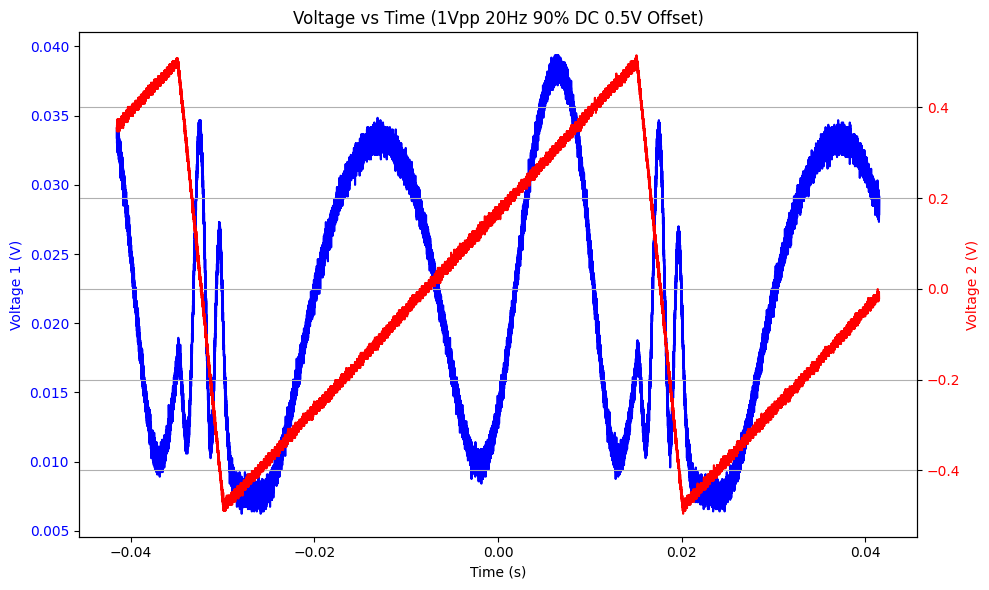

In [20]:
df2 = pd.read_csv('1vpp-20hz-90percnt-dc-0.5v0fs.csv', header=1)

# Inspect columns
print(df2.columns)

# Plot voltage vs time with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df2['second'], df2['Volt'], 'b-', label='Voltage 1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage 1 (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(df2['second'], df2['Volt.1'], 'r-', label='Voltage 2')
ax2.set_ylabel('Voltage 2 (V)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Voltage vs Time (1Vpp 20Hz 90% DC 0.5V Offset)')
plt.grid(True)

plt.tight_layout()
plt.show()

In [21]:
def get_voltage1_for_voltage2(target_v2):
    v2_array = df2['Volt.1'].values
    v1_array = df2['Volt'].values
    
    # Find indices where target lies between two points
    for i in range(len(v2_array)-1):
        if (v2_array[i] - target_v2) * (v2_array[i+1] - target_v2) <= 0:
            # Linear interpolation
            v1_interp = v1_array[i] + (target_v2 - v2_array[i]) * (v1_array[i+1] - v1_array[i]) / (v2_array[i+1] - v2_array[i])
            return v1_interp
    # If target not found in range, return closest value
    idx = np.argmin(np.abs(v2_array - target_v2))
    return v1_array[idx]

# Example usage:
target_voltage2 = 0.1  # Input your desired Voltage 2 value
voltage1_result = get_voltage1_for_voltage2(target_voltage2)
print(f"Voltage 1 corresponding to Voltage 2 = {target_voltage2} V is approximately {voltage1_result:.6f} V")

Voltage 1 corresponding to Voltage 2 = 0.1 V is approximately 0.028656 V


Index(['second', 'Volt', 'Volt.1'], dtype='object')


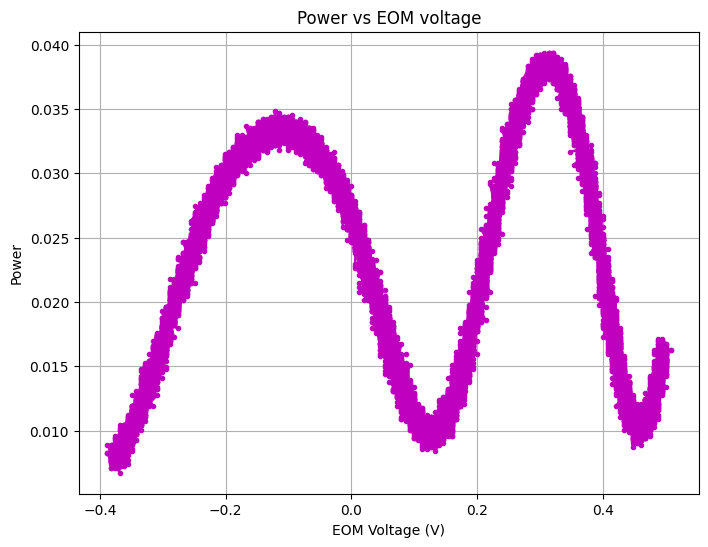

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df2 = pd.read_csv('1vpp-20hz-90percnt-dc-0.5v0fs.csv', header=1)

# Inspect columns
print(df2.columns)

# Set time limits (in seconds)
t_min, t_max = -0.025, 0.015  # adjust as needed

# Filter DataFrame for the time window
df_filtered = df2[(df2['second'] >= t_min) & (df2['second'] <= t_max)]

# Plot Volt vs Volt.1 with axes reversed and no labels
plt.figure(figsize=(8, 6))
plt.plot(df_filtered['Volt.1'], df_filtered['Volt'], 'm.-')
plt.xlabel('EOM Voltage (V)')
plt.ylabel('Power')
plt.title('Power vs EOM voltage')
plt.grid(True)
plt.show()


Index(['second', 'Volt', 'Volt.1'], dtype='object')


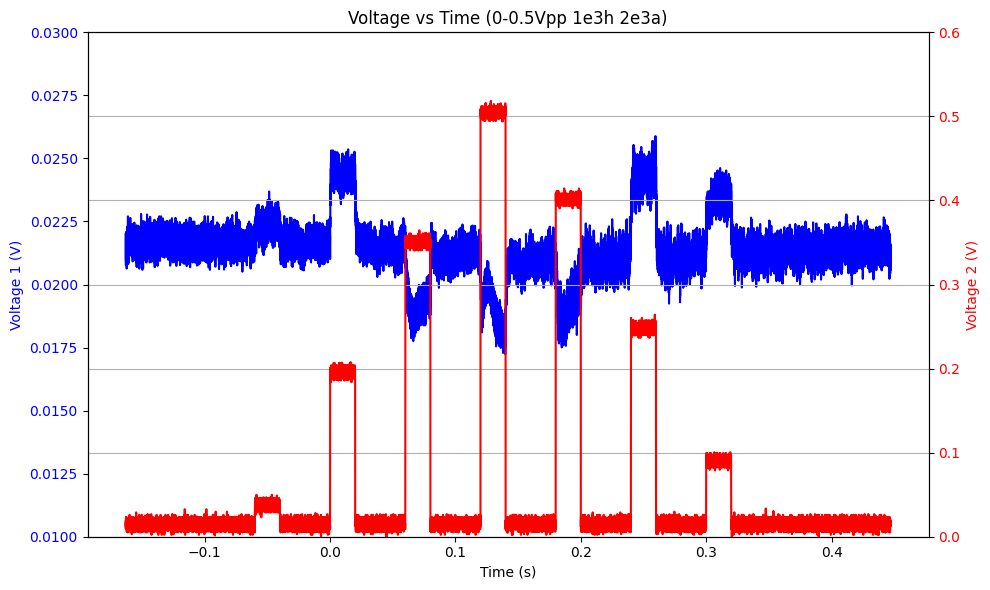

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df3 = pd.read_csv('0-0.5vpp-2e5h-4e5a.csv', header=1)
print(df3.columns)

# Plot voltage vs time with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Left Y-axis
ax1.plot(df3['second'], df3['Volt'], 'b-', label='Voltage 1')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage 1 (V)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Set y-limit for left axis
ax1.set_ylim(-0.1, 0.1)  # adjust as needed

# Right Y-axis
ax2 = ax1.twinx()
ax2.plot(df3['second'], df3['Volt.1'], 'r-', label='Voltage 2')
ax2.set_ylabel('Voltage 2 (V)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Set y-limit for right axis
ax1.set_ylim(0.01,0.03)
ax2.set_ylim(0, 0.6)  # adjust as needed

plt.title('Voltage vs Time (0-0.5Vpp 1e3h 2e3a)')
plt.grid(True)
plt.tight_layout()
plt.show()


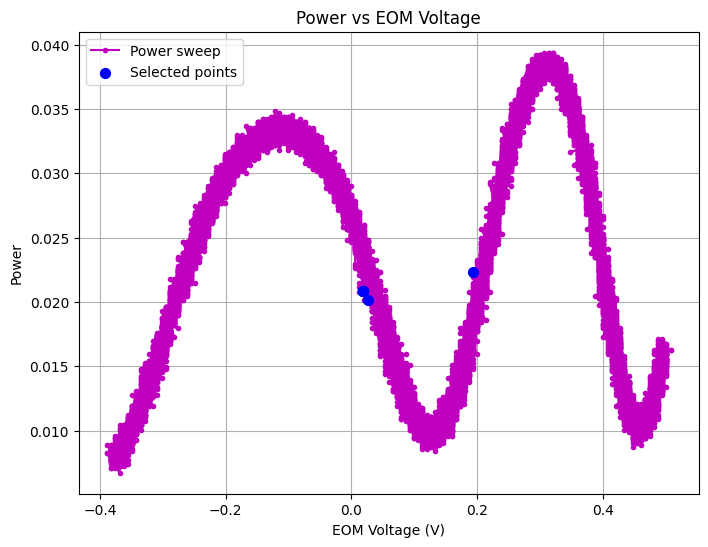

In [68]:
# Load CSV
df2 = pd.read_csv('1vpp-20hz-90percnt-dc-0.5v0fs.csv', header=1)

# Set time limits (in seconds)
t_min, t_max = -0.025, 0.015  # adjust as needed

# Filter DataFrame for the time window
df_filtered = df2[(df2['second'] >= t_min) & (df2['second'] <= t_max)]

# Plot Volt vs Volt.1 (main curve)
plt.figure(figsize=(8, 6))
plt.plot(df_filtered['Volt.1'], df_filtered['Volt'], 'm.-', label='Power sweep')

# Overlay extracted points from data_array
# data_array columns: [time_points, power, EOM power]
plt.scatter(data_array[:, 2], data_array[:, 1], color='blue', s=50, zorder=5, label='Selected points')

plt.xlabel('EOM Voltage (V)')
plt.ylabel('Power')
plt.title('Power vs EOM Voltage')
plt.grid(True)
plt.legend()
plt.show()
